In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

Libraries

In [3]:
# import pickle
import pickle

In [4]:
# Data Collection
df=pd.read_csv("iris.csv")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: ylabel='species'>

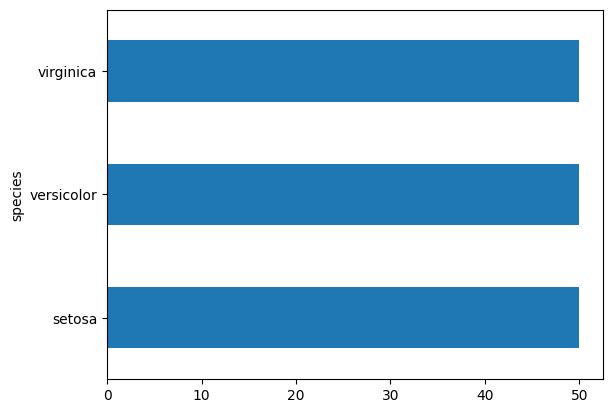

In [8]:
df['species'].value_counts().plot(kind='barh')

In [9]:
# Define Feature and Target
x=df.drop(['species'],axis=1)
y=df['species']

Preprocessing

In [10]:
pipe=Pipeline(steps=[('Scaler',StandardScaler())])
x1=pd.DataFrame(pipe.fit_transform(x),columns=pipe.get_feature_names_out())
x1

sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]

In [11]:
# transform target

la=LabelEncoder()
y1=la.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
with open('pipe.pkl','wb') as file1:
    pickle.dump(pipe,file1)


In [13]:
with open('encoder','wb') as file2:
    pickle.dump(la,file2)

In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split, GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=47)
x_train
x_test.shape

(30, 4)

In [15]:
# model Building

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
grid={'n_neighbors':[2,3,4,5,6,7,8]}
grid

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8]}

In [17]:
gs=GridSearchCV(kn,param_grid=grid,cv=2)
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 3}

In [18]:
best_knn=gs.best_estimator_

In [19]:
with open('model.pkl','wb') as file:
    pickle.dump(best_knn,file)

In [20]:
# Predictions

y_pred_train=best_knn.predict(x_train)
y_pred_train

array([2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1,
       2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 0, 1, 0, 1, 2, 0, 1, 1, 2])

In [21]:
# Training Data Evaluation
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)
acc1=accuracy_score(y_pred_train,y_train)

print("Classification Report=",clf)
print("Confusion Matrix",cnf)
print("Accurac Score",acc1)




Classification Report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.93      0.95      0.94        42
           2       0.95      0.92      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix [[39  0  0]
 [ 0 40  2]
 [ 0  3 36]]
Accurac Score 0.9583333333333334


In [22]:
# Testing Data
y_pred_test=best_knn.predict(x_test)
y_pred_test


array([0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 2, 0, 0])

In [23]:
clf1=classification_report(y_pred_test,y_test)
cnf1=confusion_matrix(y_pred_test,y_test)
acc2=accuracy_score(y_pred_test,y_test)

print("Classification Report=",clf1)
print("Confusion Matrix",cnf1)
print("Accurac Score",acc2)

Classification Report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix [[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
Accurac Score 0.9666666666666667


In [24]:
# Inverse Transform

y_pred_train_lb=la.inverse_transform(y_pred_train)
y_pred_test_lb=la.inverse_transform(y_pred_test)

In [25]:
y_pred_train_lb

array(['virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', '

In [26]:
# Predicting New Data

def predict_data(la,pipe,model):
    sepal_length=float(input('Enter sepal length:'))
    sepal_width=float(input('Enter sepal width:'))
    petal_length=float(input('Enter petal length:'))
    petal_width=float(input('Enter petal width:'))

    x_new=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    x_new.columns = pipe.get_feature_names_out()

    print('Dataframe before preprocessing:\n')
    display(x_new)

    x_pre=pipe.transform(x_new)
    x_pre=pd.DataFrame(x_pre,columns=x_new.columns)
    print('Dataframe after preprocessing:\n')
    display(x_pre)

    pred=model.predict(x_pre)
    pred_lb=la.inverse_transform(pred)[0]
    prob=model.predict_proba(x_pre).max()

    print('predicted species:',pred_lb)
    print('probablity:',prob)
    return pred_lb,prob

In [29]:
predict_data(la,pipe,best_knn)

Dataframe before preprocessing:



sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           3.0          4.0

Dataframe after preprocessing:



sepal_length  sepal_width  petal_length  petal_width
0     -4.656885    -4.735915     -0.430828     3.686579

predicted species: versicolor
probablity: 0.6666666666666666


('versicolor', np.float64(0.6666666666666666))

In [30]:
x1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')